Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Año          583 non-null    int64 
 1   Sector       583 non-null    object
 2   Colegio      583 non-null    object
 3   Código DANE  583 non-null    int64 
 4   Indicador    583 non-null    object
 5   Resultado    583 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 27.5+ KB
None

Primeras filas:
    Año   Sector                       Colegio   Código DANE  \
0  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
1  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
2  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
3  2016  Público  I.E. Adelaida Correa Estrada  105631000050   
4  2016  Público  I.E. Adelaida Correa Estrada  105631000050   

                               Indicador  Resultado  
0         Establecimiento Educa

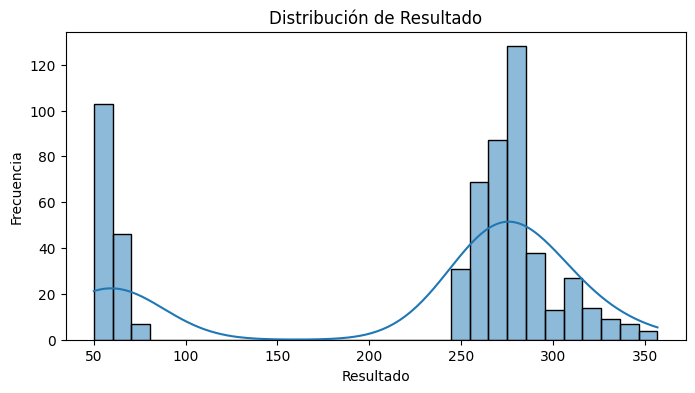

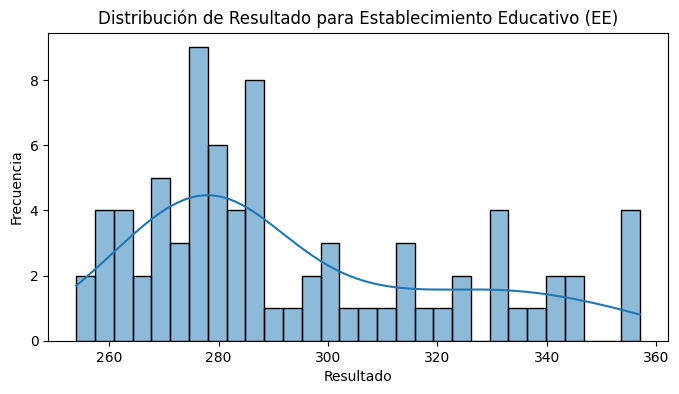

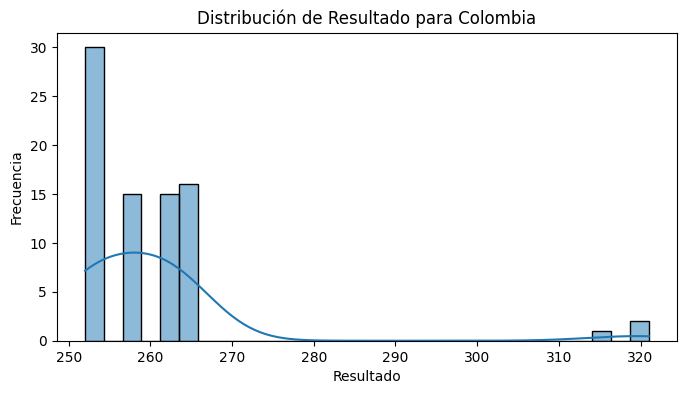

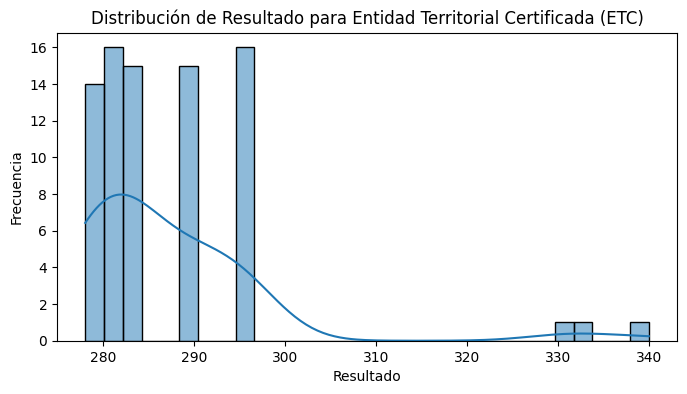

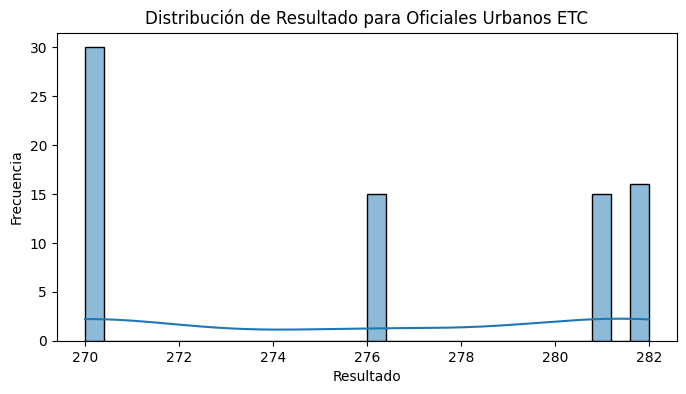

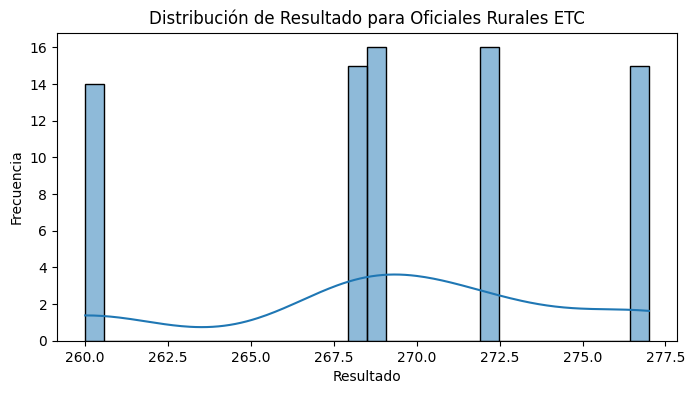

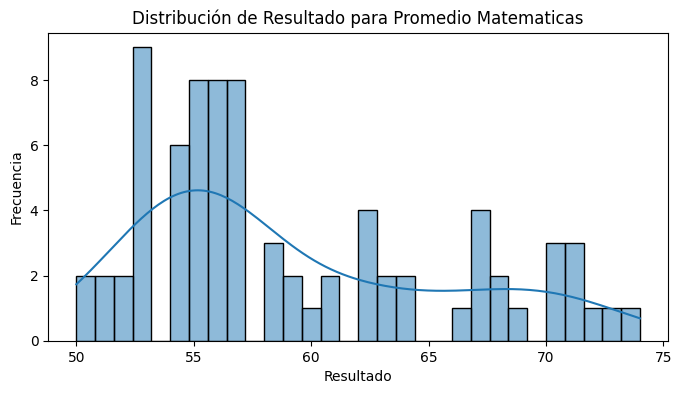

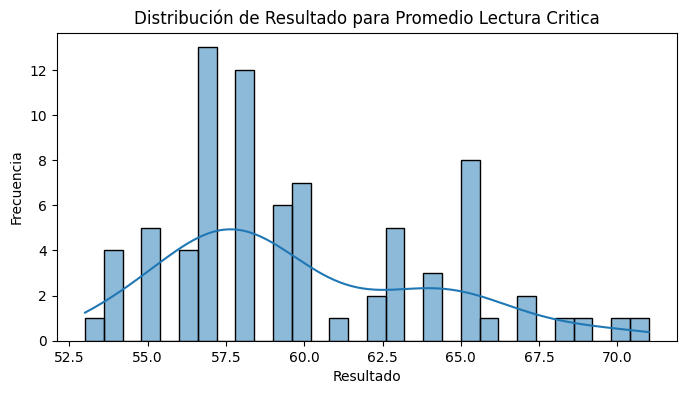

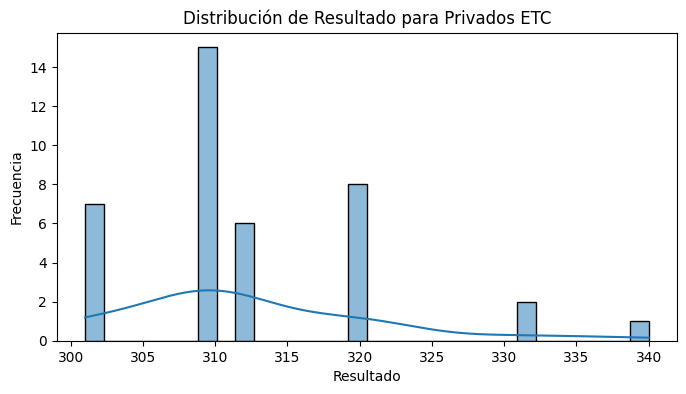

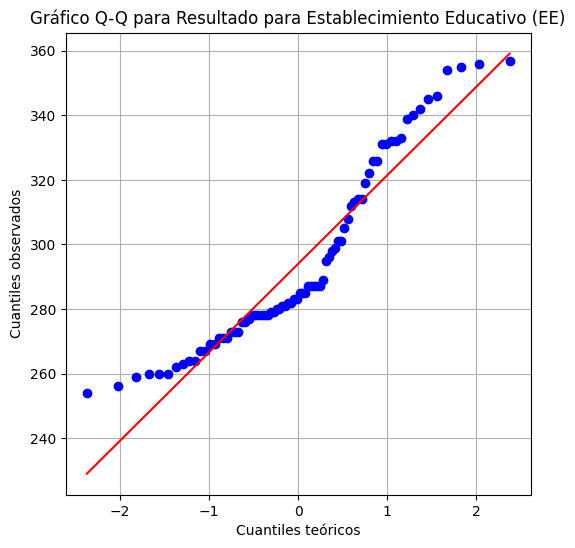

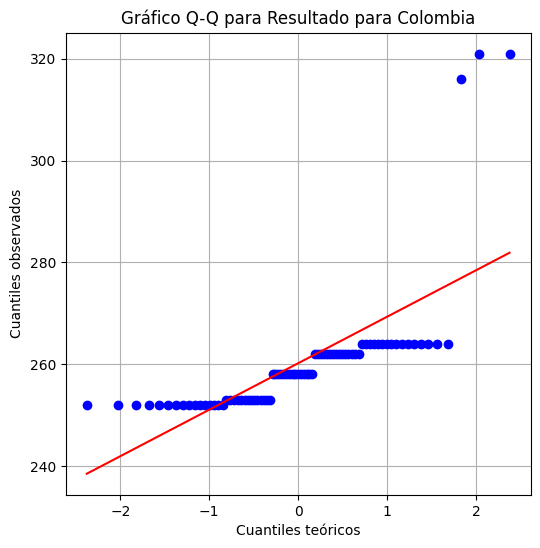

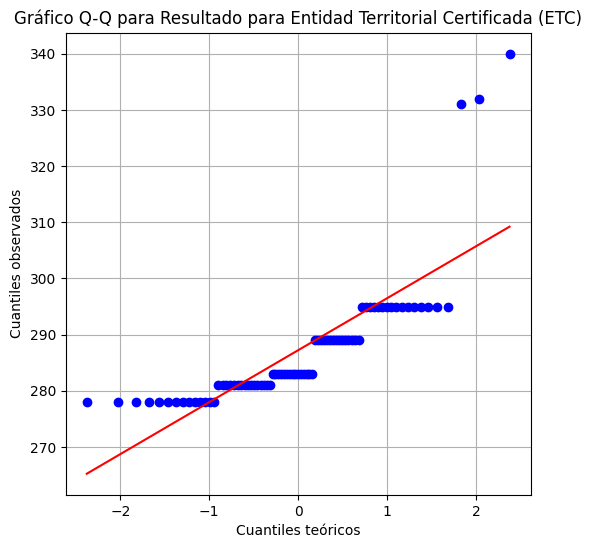

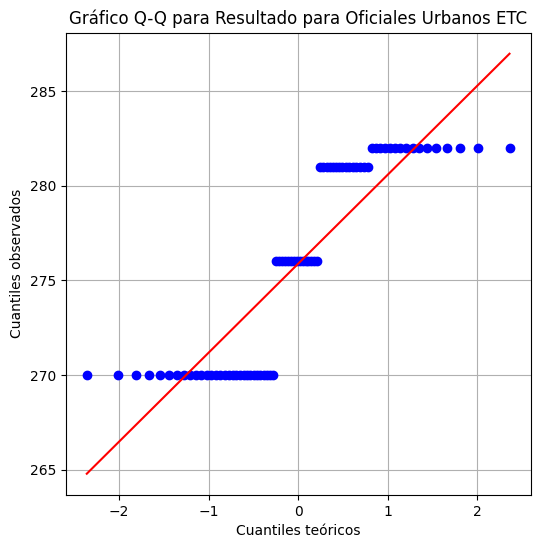

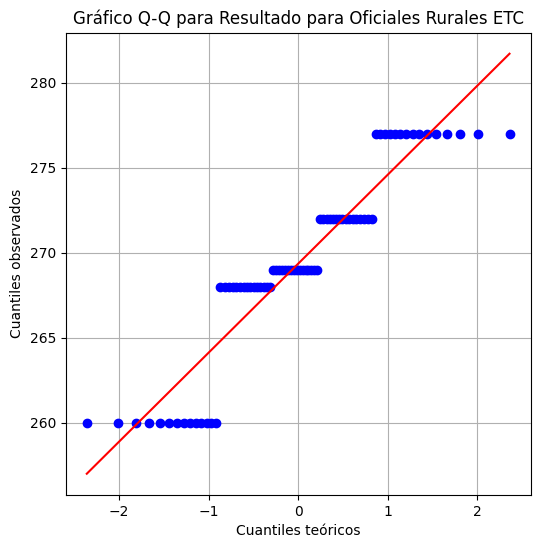

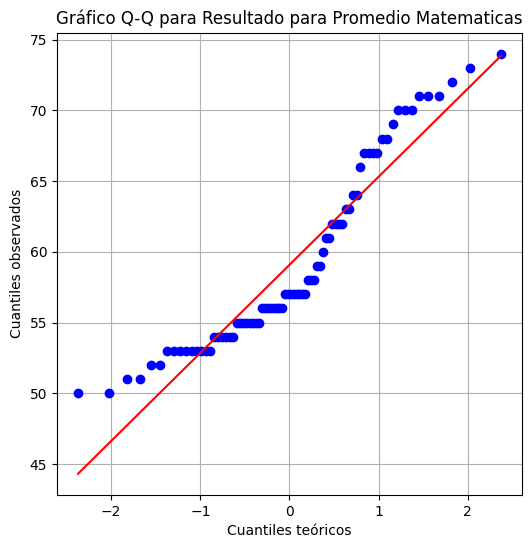

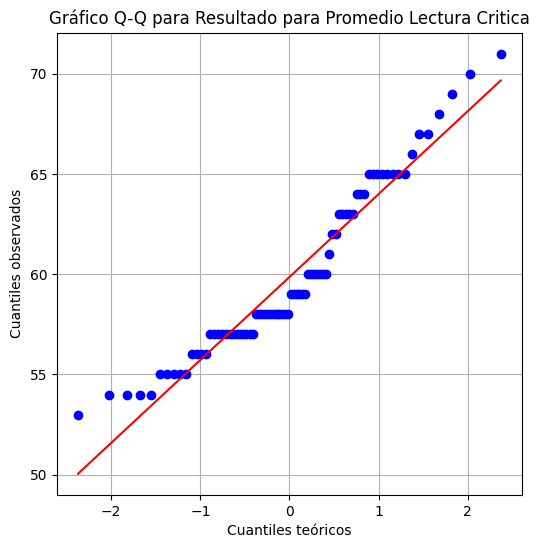

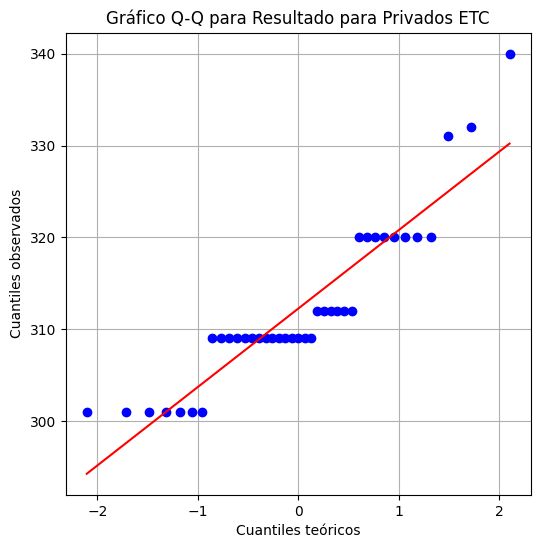

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Cargar el archivo CSV
df = pd.read_csv('ResultadosSabanetaSaber11.csv')

# Mostrar información general
print('Información del dataset:')
print(df.info())

# Visualizar las primeras filas
print('\nPrimeras filas:')
print(df.head())

# Estadísticas descriptivas
print('\nEstadísticas descriptivas:')
print(df.describe())

print(df.isnull().sum())

# Rellenar valores nulos con la media de cada columna numérica
df.fillna(df.mean(numeric_only=True), inplace=True)

# Confirmar que no quedan nulos
print('\nValores nulos tras la imputación:')
print(df.isnull().sum())

columnas_puntajes = [
    'Resultado'
]

for columna in columnas_puntajes:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[columna], kde=True, bins=30)
    plt.title(f'Distribución de {columna}')
    plt.xlabel(columna)
    plt.ylabel('Frecuencia')
    plt.show()

for indicador in df['Indicador'].unique():
    df_indicador = df[df['Indicador'] == indicador]
    plt.figure(figsize=(8, 4))
    sns.histplot(df_indicador['Resultado'], kde=True, bins=30)
    plt.title(f'Distribución de Resultado para {indicador}')
    plt.xlabel('Resultado')
    plt.ylabel('Frecuencia')
    plt.show()

def graficar_qq(datos, nombre):
    plt.figure(figsize=(6, 6))
    stats.probplot(datos, dist="norm", plot=plt)
    plt.title(f"Gráfico Q-Q para {nombre}")
    plt.xlabel("Cuantiles teóricos")
    plt.ylabel("Cuantiles observados")
    plt.grid(True)
    plt.show()

for indicador in df['Indicador'].unique():
    df_indicador = df[df['Indicador'] == indicador]
    graficar_qq(df_indicador['Resultado'].dropna(), f"Resultado para {indicador}")